# Table of Contents

1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data)
    
    1.1 [Initial Exploration](#1.1-Initial-Exploration) <br><br>
    
2. [Data Pre-Processing](#2.Data-Pre-Processing)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Incoherencies](#2.3-Incoherencies)
    
    2.4 [Outliers](#2.4-Outliers)
    
    2.5 [Feature Engineering](#2.5-Feature-Engineering)
    
    2.6 [Visualisations](#2.6-Visualisations) <br><br>
    
    


# 1. Importing Libraries & Data

In [1]:
#Data processing libraries
import pandas as pd
import numpy as np 

# For missing values detection
import missingno as msno

# Show all columns of the dataset
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./DM2425_ABCDEats_DATASET.csv')
data

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## 1.1 Initial Exploration

In [3]:
'''profile = ProfileReport(
    data, 
    title='Data',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

profile'''

'profile = ProfileReport(\n    data, \n    title=\'Data\',\n    correlations={\n        "pearson": {"calculate": True},\n        "spearman": {"calculate": False},\n        "kendall": {"calculate": False},\n        "phi_k": {"calculate": False},\n        "cramers": {"calculate": False},\n    },\n)\n\nprofile'

# Data Pre-Processing

In [4]:
pd.set_option('display.max_rows', None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


In [5]:
pd.reset_option('display.max_rows', None)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

## 2.1 Missing Values

In [7]:
data[data['customer_age'].isna()]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
27,8e8652bdc8,4660,NaN,2,3,2,0.0,6,DISCOUNT,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,34.88,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
37,6137fa5620,8670,NaN,2,2,2,0.0,8,DISCOUNT,CARD,6.13,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,13.15,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
69,2a90e9da84,4660,NaN,2,2,1,0.0,17,-,CARD,15.99,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,1.54,0.0,0.0,0.00,0.00,0.0,0,0,1,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
73,a67d3108cb,8670,NaN,2,2,1,0.0,17,-,CARD,0.00,25.85,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,1,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31488,46aa9dfeb0,8670,NaN,1,2,0,87.0,87,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,25.05,0.0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31572,29207a92c8,2360,NaN,1,1,1,88.0,88,-,CASH,0.00,0.00,3.88,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,1,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31762,d7bf721199,2360,NaN,1,1,1,89.0,89,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,3.74,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
31877,ee49f4eb0a,2440,NaN,1,1,1,NaN,0,DELIVERY,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,3.16,0.00,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
data.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

We can visualize and analyse missing values by using the library ``missingno``. This library provides different visualizations, such as heatmaps and dendograms, that help us in identifying and understanding patterns of missingness in data. 

##### Missingno Bar Chart

Below we have plotted the count of values per column, organized in descending order. This means that columns with the lowest values are positioned at the beginning, followed by those with higher counts.

<Axes: >

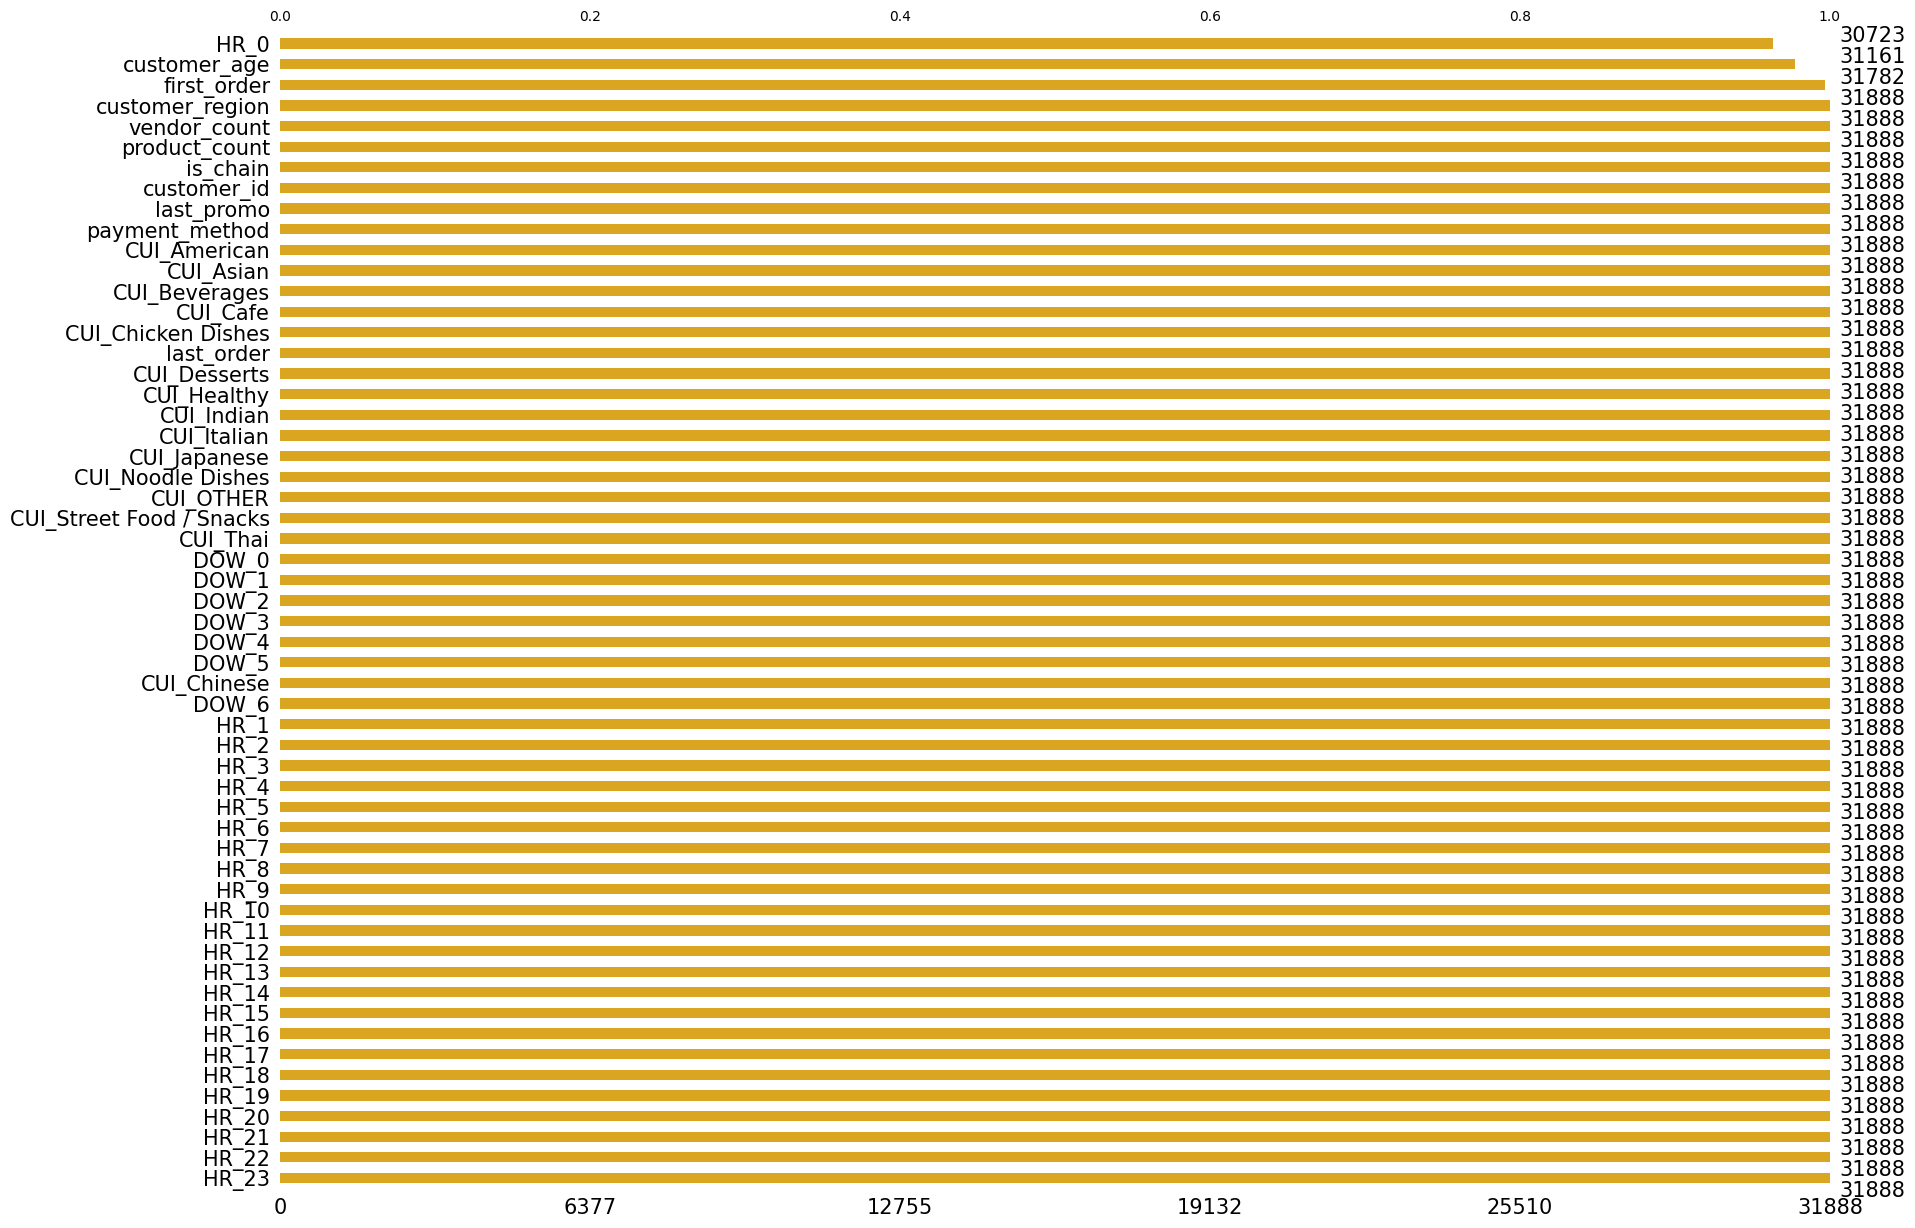

In [9]:
# Bar Chart
msno.bar(data, figsize=(20,15), fontsize=15, color='goldenrod', sort="descending")

As it can be seen and as mentioned previously, we can see that the columns ``HR_0``, ``customer_age`` and ``first_order`` exhibit missing values. These three variables have a relatively low percentage of missing data, with less than 5% of their values missing.

##### Heatmap visualization
We can also use the ``missingno`` library to explore the relationships between missing values across column pairs. By analyzing the nullity correlation, we can identify columns whose missing data are either directly or inversely related. In this analysis, only columns with missing values are considered.

A nullity correlation value close to 1 indicates a strong positive relationship, meaning that if one column has a missing value, the other is likely to have one as well. On the other hand, a correlation value near -1 suggests a strong inverse relationship, where one column is missing values while the other is not. Values around zero indicate no significant correlation between the missing data in the two columns.

<Axes: >

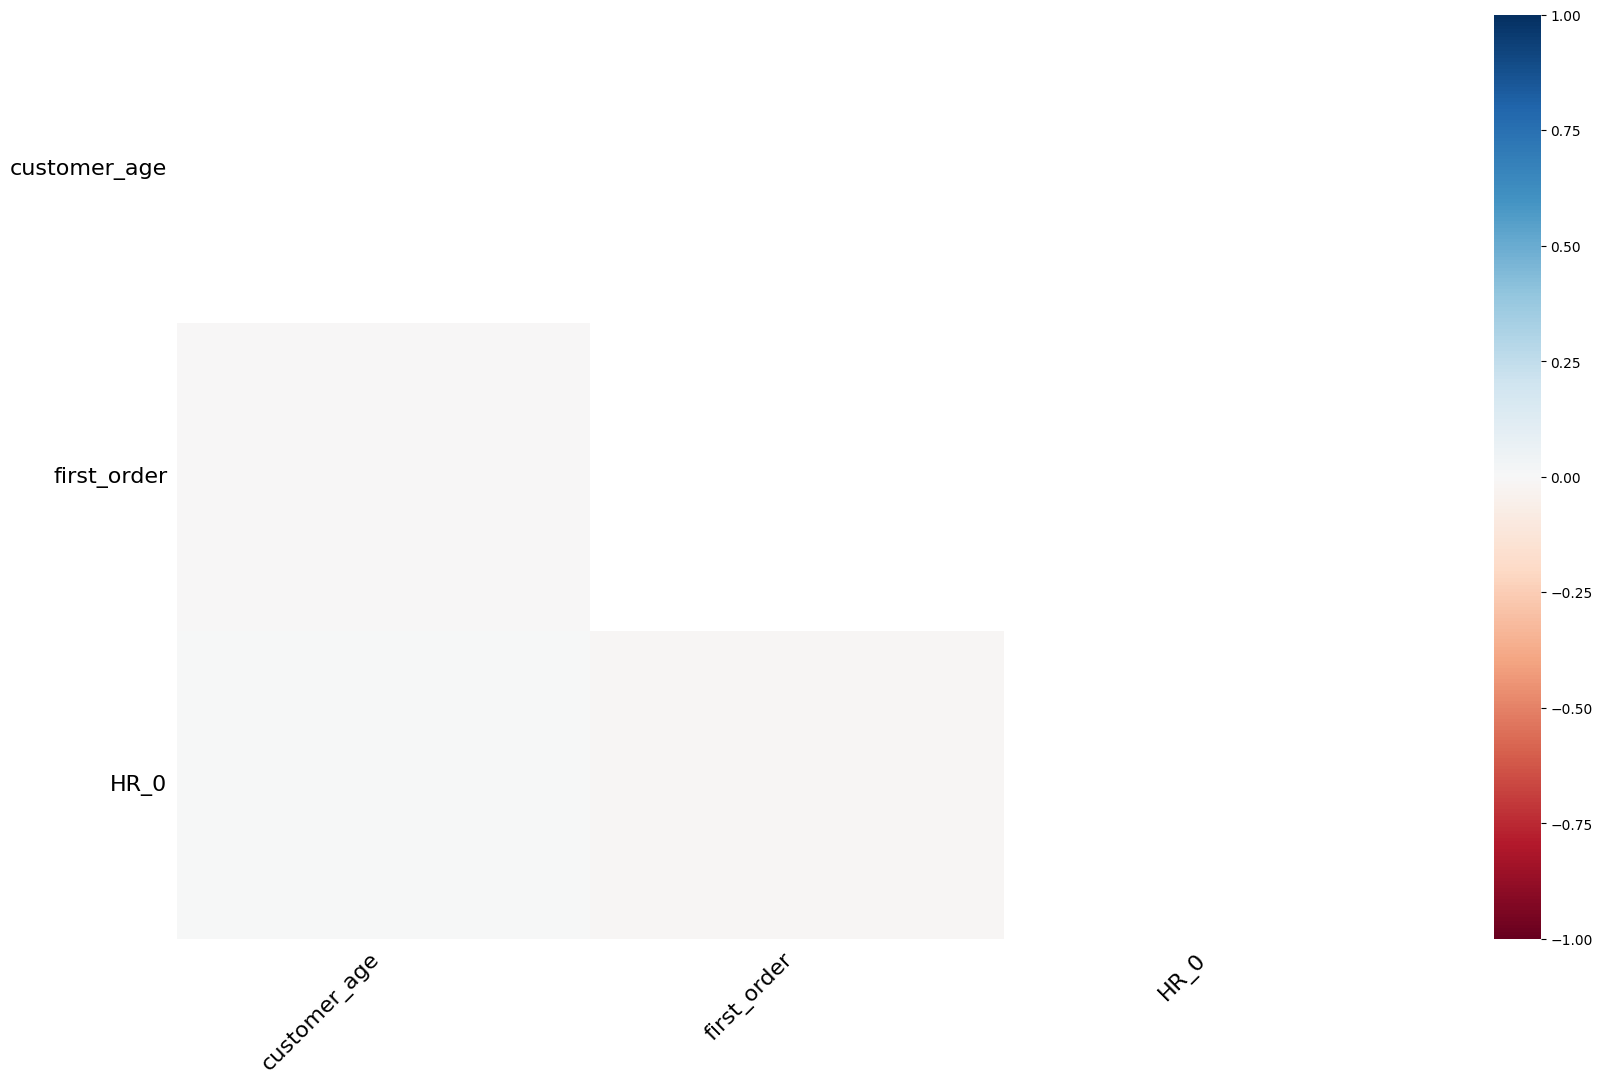

In [10]:
msno.heatmap(data)

From the visualization, it is clear that there is no direct correlation between any pair of the variables with missing values. The absence of displayed correlation values suggests that the correlation either is rounded to 0 (between -0.05 and 0.05) or is exactly 0. This indicates that the missing values in one column have no significant relationship with those in another, meaning the occurrence of missing data is likely independent across these variables - Missing Completely at Random (MCAR).

<br>

### Handling the missing values

In [11]:
# Identify the favorite cuisine of each customer
cuisine_columns = [col for col in data.columns if col.startswith('CUI_')]

# Create a new column with the favorite cuisine of each customer
data['favorite_cuisine'] = data[cuisine_columns].idxmax(axis=1)

# Create a new column with the region and favorite cuisine of each customer
data['region_cuisine_group'] = data['customer_region'] + "_" + data['favorite_cuisine']

# Calculate the average age of customers in each region and cuisine group
age_means = data.groupby('region_cuisine_group')['customer_age'].mean()

In [12]:
# Create a function to impute missing values of age
def impute_age(row):
    if np.isnan(row['customer_age']):
        return int(round(age_means.get(row['region_cuisine_group'], np.nan)))
    else:
        return row['customer_age']

# Apply the function to impute missing values of age
data['customer_age'] = data.apply(impute_age, axis=1)

# Check if there are still missing values of age
missing_ages = data['customer_age'].isna().sum()
print(f"There are still {missing_ages} age values to impute.")

There are still 0 age values to impute.


In [13]:
data

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,CUI_Indian,2360_CUI_Indian
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,4660_CUI_American
3,180c632ed8,4660,27.0,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,CUI_Indian,4660_CUI_Indian
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Asian,4660_CUI_Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,CUI_Beverages,8670_CUI_Beverages
31884,f6b6709018,8670,27.0,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Desserts,8670_CUI_Desserts
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Asian,8670_CUI_Asian


## 2.2 Duplicates

## 2.3 Incoherencies

*Check the customer's ages*

In [14]:
data['customer_age'].min() # What is the minimum legal age to order deliveries?

np.float64(15.0)

In [15]:
data[data['customer_age'] == 15]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
20,e79f867434,8670,15.0,2,3,1,0.0,5,DELIVERY,DIGI,6.06,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,23.92,0.00,0.00,0.00,0.00,0,0,0,0,1,0,1,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Japanese,8670_CUI_Japanese
555,95457a237c,2440,15.0,4,5,4,0.0,69,-,CASH,4.64,0.00,2.21,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.77,6.32,0.00,0,1,1,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0,0,0,0,0,CUI_Street Food / Snacks,2440_CUI_Street Food / Snacks
1808,a763ccaa87,4660,15.0,10,17,11,1.0,67,-,CARD,13.68,28.62,0.00,0.0,0.00,0.00,0.0,4.85,8.15,11.58,15.62,0.00,0.00,0.00,0.00,2,6,2,1,5,0,0,0.0,0,0,0,0,0,0,4,0,2,2,1,2,2,2,0,0,1,0,0,0,0,0,0,CUI_Asian,4660_CUI_Asian
2932,29e9751b2b,2360,15.0,11,21,17,2.0,76,-,CARD,0.00,4.48,0.00,0.0,8.80,9.72,0.0,0.00,0.00,0.00,0.00,25.84,14.94,0.00,1.42,7,2,1,1,2,2,2,0.0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,1,10,1,0,0,0,0,CUI_Noodle Dishes,2360_CUI_Noodle Dishes
3981,89caac873e,2360,15.0,2,6,2,3.0,82,-,CARD,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,25.88,0.00,0.00,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,CUI_OTHER,2360_CUI_OTHER
4425,eeade5ca4b,2360,15.0,4,6,4,4.0,22,DELIVERY,CASH,0.00,7.37,0.00,0.0,14.16,0.00,0.0,0.00,3.67,0.00,0.00,0.00,0.00,0.00,0.00,2,0,0,2,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,CUI_Chicken Dishes,2360_CUI_Chicken Dishes
10039,22e7462446,2360,15.0,1,3,3,11.0,44,DISCOUNT,CARD,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,4.69,0.00,0.00,0.00,0.00,1,1,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,CUI_Japanese,2360_CUI_Japanese
11461,8bf5bf209f,2360,15.0,9,12,12,13.0,87,DISCOUNT,CARD,0.00,1.28,9.66,0.0,0.00,4.63,0.0,0.00,0.00,0.00,0.00,7.57,2.78,0.00,0.54,0,3,1,1,3,2,2,NaN,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,4,0,2,0,0,CUI_Beverages,2360_CUI_Beverages
16724,f43ee5861f,8670,15.0,7,14,6,24.0,85,-,CARD,0.00,12.59,6.28,0.0,0.00,0.00,0.0,100.88,0.00,0.00,0.00,0.00,0.00,20.04,0.00,3,3,2,2,1,0,0,0.0,0,0,1,4,2,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Healthy,8670_CUI_Healthy
17723,d7ac8e4fb6,8670,15.0,1,1,0,27.0,27,DISCOUNT,DIGI,18.67,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American


In [16]:
data['customer_age'].max()

np.float64(80.0)

*Check the number of unique vendors*

In [58]:
data['vendor_count'].min()

np.int64(0)

In [59]:
data[data['vendor_count'] == 0] # They didnt buy from any store?

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
1449,4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
1476,c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
1488,f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
2486,c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
3391,1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31377,177ede2420,8670,30.0,0,0,1,86.0,86,-,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
31553,0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
31667,0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
31680,28ed1f1e3f,8670,20.0,0,0,0,89.0,89,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American


*Check the total number of oredered products*

In [62]:
data['product_count'].min()

np.int64(0)

In [64]:
data[data['product_count'] == 0] # They didnt order anything. Why are they considered costumers?

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
1449,4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
1476,c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
1488,f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
2486,c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
3391,1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31553,0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
31667,0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
31680,28ed1f1e3f,8670,20.0,0,0,0,89.0,89,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American
31695,4c06e104de,8670,25.0,0,0,1,89.0,89,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_American,8670_CUI_American


*Check is_chain*

# Consideramos binária? Demasiados valores são diferentes de 0 ou 1. Consideramos que seja o número de chains a que o customer foi?

*Check the category of promotion or discount*

In [17]:
data['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

Detected unkown category: '-'

Is it because there was no promotion or discount? Is it the same as 'DELIVERY'

In [18]:
data[data['last_promo'] == '-']

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,favorite_cuisine,region_cuisine_group
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Asian,4660_CUI_Asian
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,5.88,0.00,1.53,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,CUI_American,2440_CUI_American
13,dce8e4700a,8670,26.0,2,2,0,0.0,4,-,DIGI,0.00,23.62,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Asian,8670_CUI_Asian
14,f3070b7bbf,2360,21.0,2,2,2,0.0,4,-,CASH,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,9.9,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Indian,2360_CUI_Indian
17,7d9a62afd6,2440,27.0,2,3,2,0.0,5,-,DIGI,0.00,0.00,2.33,0.0,6.21,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,CUI_Chicken Dishes,2440_CUI_Chicken Dishes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31871,e11a26e7ba,8670,28.0,1,1,0,NaN,0,-,CARD,0.00,6.13,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Asian,8670_CUI_Asian
31875,e879afcc21,8670,41.0,1,1,0,NaN,0,-,CARD,0.00,0.00,0.00,0.0,0.00,0.0,6.22,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Desserts,8670_CUI_Desserts
31880,f1ab8a54c4,4660,23.0,1,1,0,NaN,0,-,CARD,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,13.53,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,CUI_OTHER,4660_CUI_OTHER
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.00,0.0,17.79,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CUI_Desserts,8670_CUI_Desserts


*Check the payment methods*

In [19]:
data['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

# O resto das incoherencies podem ser verificas na funcao describe ao verificar o min e o max

## 2.4 Outliers

In [26]:
numerical_df = data.loc[:,(data.dtypes != 'object') == True]
numerical_df

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,18.0,2,5,1,0.0,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,17.0,2,2,2,0.0,1,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,38.0,1,2,2,0.0,1,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,27.0,2,3,1,0.0,2,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,20.0,2,5,0,0.0,2,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,30.0,1,1,1,NaN,0,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31884,27.0,1,1,0,NaN,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31885,24.0,1,1,1,NaN,0,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31886,34.0,1,1,0,NaN,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
num_variables_array = np.array(numerical_df.columns)

In [38]:
num_variables_array

array(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'], dtype=object)

In [55]:
def IQR_outliers(df: pd.DataFrame,
                  variables: list[str]
                  ) -> None:
    """
    Identify potential outliers using the interquartile
      range (IQR) method.

    ----------
    Parameters:
     - df (pd.DataFrame): The pandas dataframe to be
        analyzed.
     - variables (list): A list of column names in the
        dataframe to check for outliers.

    ----------
    Returns:
     - None, but prints the potential outliers for each
        variable along with the number of outliers.
    """

    # Calculate the IQR for each variable
    q1 = df[variables].quantile(0.25)
    q3 = df[variables].quantile(0.75)
    iqr = q3 - q1

    # Identify potential outliers for each variable
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3 * iqr)

    outliers = {}
    for var in variables:
        outliers[var] = df[(df[var] < lower_bound[var]) | (df[var] > upper_bound[var])][var]

    # Print the potential outliers for each variable
    print('-------------------------------------')
    print('          Potential Outliers         ')
    print('-------------------------------------')

    for var in outliers:
        print(var, ': Number of Outliers ->', len(outliers[var]))
        if len(outliers[var]) != 0:
            outliers[var] = np.unique(outliers[var])
            print('  Outliers: ',outliers[var])
        print()


In [56]:
IQR_outliers(data, num_variables_array)

-------------------------------------
          Potential Outliers         
-------------------------------------
customer_age : Number of Outliers -> 159
  Outliers:  [56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73.
 74. 75. 76. 77. 78. 79. 80.]

vendor_count : Number of Outliers -> 369
  Outliers:  [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 40 41]

product_count : Number of Outliers -> 934
  Outliers:  [ 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  72  73  75  76  77  79
  80  81  82  83  84  87  88  89  91  94  95  97 109 110 117 269]

is_chain : Number of Outliers -> 1602
  Outliers:  [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 42 43 44 45 46 47 48 49 54 56 61 63 65 67 73 75 80
 81 83]

first_order : Number of Outliers -> 0

last_order : Num

## 2.5 Feature Engineering

In [7]:
### DUVIDAS

## Valores para is_chain #make assumptions number of orders
## customer region code pode ser descodificado para fazer mapa?

### Possibilidades
## criar bins para as idades (tipo young - 0, old -3)

In [8]:
for column in data.columns:
    
    if data[column].nunique() < 100:
        
        print(f"Unique values in '{column}': {data[column].unique()}\n")

Unique values in 'customer_region': ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']

Unique values in 'customer_age': [18. 17. 38. nan 20. 40. 24. 27. 33. 26. 21. 51. 35. 22. 31. 15. 47. 19.
 28. 32. 25. 37. 42. 48. 16. 34. 29. 23. 30. 39. 46. 41. 49. 53. 36. 43.
 44. 45. 57. 58. 68. 56. 61. 60. 54. 59. 50. 55. 52. 65. 75. 66. 79. 80.
 63. 77. 62. 69. 72. 64. 76. 74. 67. 70. 78. 71. 73.]

Unique values in 'vendor_count': [ 2  1  3  4  5  7  6 11  9  8 12 14 20 13 10 16 24 18 17 15 25 30 19 21
 23 22 28 32 41 40 26  0 27 34 31 35 29]

Unique values in 'product_count': [  5   2   3   4   6  10   8  17   7  26   9  32  15  13  16  28  19  12
  18  11  25  14  23  29  21  31  95  24  64  27  37  49  22  41  51  34
  39  20  30  47  40  53  38  54  35  33  56  65  45  63  36  79  48  70
  44  84  46  66  57  58  83 110 117 269  75  55  42  81  91  43  69  67
  72  59   1   0  77  97  87  73  76  60 109  52  62  94  80  89  61  82
  50  88  68]

Unique values in 'is_chain': [ 1

In [5]:
data = data.dropna()

In [13]:
data.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,first_order_date,last_order_date,days_between,last_promo_d,payment_method_d,total_week
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,01-01-2024,02-01-2024,1.0,1,0,2
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,01-01-2024,02-01-2024,1.0,2,0,2
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,01-01-2024,02-01-2024,1.0,2,1,2


*Dates*

In [19]:
from datetime import datetime, timedelta

start_date = datetime(2024, 1, 1)

data['first_order_date'] = data['first_order'].apply(
    lambda x: (start_date + timedelta(days=x)).strftime('%d-%m-%Y')
)

data['last_order_date'] = data['last_order'].apply(
    lambda x: (start_date + timedelta(days=x)).strftime('%d-%m-%Y')
)


*Days between the first and last transaction*

In [20]:
data['days_between'] = data['last_order'] - data['first_order']

*Dummies for Last Promotion variable*

In [21]:
data['last_promo_d'] = data['last_promo'].replace({
    '-': 0,
    'DELIVERY': 1,
    'DISCOUNT': 2,
    'FREEBIE': 3
})

*Dummies for Payment Method*

In [22]:
data['payment_method_d'] = data['payment_method'].replace({
    'DIGI': 0,
    'CASH': 1,
    'CARD': 2
})

*Total orders per week*

In [23]:
data['total_orders'] = data['DOW_0'] + data['DOW_1'] + data['DOW_2'] + data['DOW_3'] + data['DOW_4'] + data['DOW_5'] + data['DOW_6']

*Average hour for order placed*

In [24]:
hourly_orders = data.filter(like='HR_')

def avg_hour(row):
    total_orders = row.sum()
    
    if total_orders == 0:
        return None  
    
    weighted_sum_hours = (row.index.str.replace('HR_', '').astype(int) * row).sum()
    return weighted_sum_hours / total_orders

# Apply the function to each row and create a new column
data['avg_order_hour'] = hourly_orders.apply(avg_hour, axis=1)


*Total Spend*

In [25]:
columns_to_sum = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
    'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 
    'CUI_Street Food / Snacks', 'CUI_Thai'
]


data['total_spend'] = data[columns_to_sum].sum(axis=1)


*Average Spend per Product*

In [35]:
data['avg_spend_prod'] = np.where(data['product_count'] > 0, 
                                   data['total_spend'] / data['product_count'], 
                                   0) 

*Customers that made more than 1 order*

In [27]:
data['is_repeat_customer'] = (data['days_between'] > 0).astype(int)

*Promotion Engagement*

In [30]:
data['has_used_promo'] = (data['last_promo_d'] > 0).astype(int)